# Quantum Entanglement Swapping: Non-Maximally Entangled States
## State preparation

$ \vert\Phi^+\rangle_{\textcolor{red}{A}B} \otimes \vert\Phi^+\rangle_{C\textcolor{orange}{D}}$ replaced with:

$$ \vert\phi^+\rangle_{\textcolor{red}{A}B} = \frac{1}{2}\left(\vert00\rangle_{AB} + \sqrt{3}\vert11\rangle_{AB}\right)$$

$$ \vert\psi^+\rangle_{C\textcolor{orange}{D}} = \frac{1}{2}\left(\vert01\rangle_{AB} + \sqrt{3}\vert10\rangle_{AB}\right)$$

the curcuit to achive $\vert\phi^+\rangle_{\textcolor{red}{A}B}$ is below:

   ┌─────────┐┌───┐┌───┐     
A: ┤ Rx(π/3) ├┤ S ├┤ X ├──■──
   └─────────┘└───┘└───┘┌─┴─┐
B: ─────────────────────┤ X ├
                        └───┘
Statevector([0.5      +0.j, 0.       +0.j, 0.       +0.j, 0.8660254+0.j],
            dims=(2, 2))


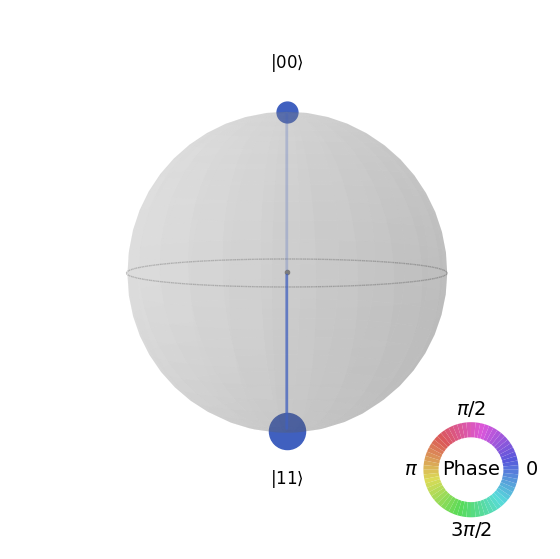

In [4]:
# Import necessary libraries from Qiskit
from qiskit import QuantumCircuit
from qiskit.circuit import QuantumRegister
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_state_qsphere
from numpy import sqrt, pi

bell_fp = QuantumCircuit(QuantumRegister(1, 'A'), QuantumRegister(1, 'B'))

bell_fp.rx(pi/3,0)
bell_fp.s(0)
bell_fp.x(0)
bell_fp.cx(0, 1)

sv_fp = Statevector([1,0,0,0])
new_sv_fp = sv_fp.evolve(bell_fp)

print(bell_fp)
print(new_sv_fp)
plot_state_qsphere(new_sv_fp)

the curcuit to achive $ \vert\Psi^+\rangle_{C\textcolor{orange}{D}}$ is below:

   ┌─────────┐┌───┐┌───┐     ┌───┐
A: ┤ Rx(π/3) ├┤ S ├┤ X ├──■──┤ X ├
   └─────────┘└───┘└───┘┌─┴─┐└───┘
B: ─────────────────────┤ X ├─────
                        └───┘     
Statevector([0.       +0.j, 0.5      +0.j, 0.8660254+0.j, 0.       +0.j],
            dims=(2, 2))


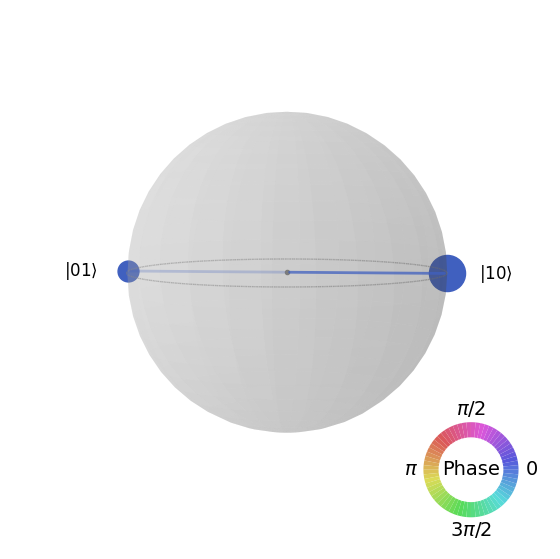

In [13]:
# Import necessary libraries from Qiskit
from qiskit import QuantumCircuit
from qiskit.circuit import QuantumRegister
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_state_qsphere

bell_pp = QuantumCircuit(QuantumRegister(1, 'A'), QuantumRegister(1, 'B'))
bell_pp.rx(pi/3,0)
bell_pp.s(0)
bell_pp.x(0)
bell_pp.cx(0, 1)
bell_pp.x(0)

sv_pp = Statevector([1,0,0,0])
new_sv_pp = sv_pp.evolve(bell_pp)

print(bell_pp)
print(new_sv_pp)
plot_state_qsphere(new_sv_pp)

the curcuit to achive $\vert\Phi^+\rangle_{\textcolor{red}{A}B} \otimes \vert\Psi^+\rangle_{C\textcolor{orange}{D}}$ is below:

     ┌─────────┐┌───┐┌───┐          
  A: ┤ Rx(π/3) ├┤ S ├┤ X ├──■───────
     └─────────┘└───┘└───┘┌─┴─┐     
  B: ─────────────────────┤ X ├─────
     ┌─────────┐┌───┐┌───┐└───┘┌───┐
  C: ┤ Rx(π/3) ├┤ S ├┤ X ├──■──┤ X ├
     └─────────┘└───┘└───┘┌─┴─┐└───┘
  D: ─────────────────────┤ X ├─────
                          └───┘     
c: 2/═══════════════════════════════
                                    
Statevector([0.       +0.j, 0.       +0.j, 0.       +0.j, 0.       +0.j,
             0.25     +0.j, 0.       +0.j, 0.       +0.j, 0.4330127+0.j,
             0.4330127+0.j, 0.       +0.j, 0.       +0.j, 0.75     +0.j,
             0.       +0.j, 0.       +0.j, 0.       +0.j, 0.       +0.j],
            dims=(2, 2, 2, 2))


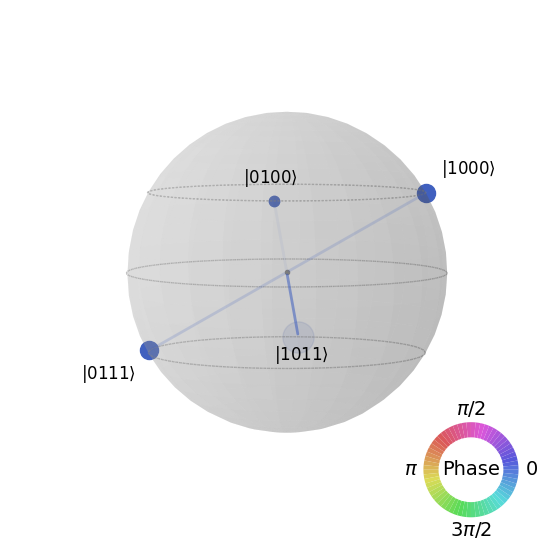

In [14]:
# Import necessary libraries from Qiskit
from qiskit import QuantumCircuit, transpile
from qiskit.circuit import QuantumRegister, ClassicalRegister
from qiskit.quantum_info import SparsePauliOp
from qiskit.primitives import Estimator
from qiskit.primitives import Sampler
from qiskit.visualization import plot_histogram
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_state_qsphere

# Create a Modified Bell state quantum circuit
cr=ClassicalRegister(2,'c')
bell = QuantumCircuit(QuantumRegister(1, 'A'), QuantumRegister(1, 'B'), QuantumRegister(1, 'C'), QuantumRegister(1, 'D'), cr)

bell.rx(pi/3,0)
bell.s(0)
bell.x(0)
bell.cx(0, 1)

bell.rx(pi/3,2)
bell.s(2)
bell.x(2)
bell.cx(2, 3)
bell.x(2)


sv = Statevector([1,0,0,0, 0,0,0,0, 0,0,0,0, 0,0,0,0])
new_sv = sv.evolve(bell)

print(bell)
print(new_sv)
plot_state_qsphere(new_sv)

## Entanglement swap curcit

Original Circuit:
     ┌─────────┐┌───┐┌───┐      ░                                  ░ ┌───┐   »
  A: ┤ Rx(π/3) ├┤ S ├┤ X ├──■───░──────────────────────────────────░─┤ X ├─■─»
     └─────────┘└───┘└───┘┌─┴─┐ ░      ┌───┐┌───┐┌───┐┌──────────┐ ░ └─┬─┘ │ »
  B: ─────────────────────┤ X ├─░───■──┤ X ├┤ S ├┤ Z ├┤ Rx(-π/3) ├─░───┼───■─»
     ┌─────────┐┌───┐┌───┐└───┘ ░ ┌─┴─┐└───┘└───┘└───┘└──────────┘ ░   │     »
  C: ┤ Rx(π/3) ├┤ S ├┤ X ├──■───░─┤ X ├────────────────────────────░───■─────»
     └─────────┘└───┘└───┘┌─┴─┐ ░ └───┘                            ░         »
  D: ─────────────────────┤ X ├─░──────────────────────────────────░─────────»
                          └───┘ ░                                  ░         »
c: 2/════════════════════════════════════════════════════════════════════════»
                                                                             »
«      ░      ┌───┐┌───┐┌───┐┌──────────┐ ░ ┌─┐   
«  A: ─░───■──┤ X ├┤ S ├┤ Z ├┤ Rx(-π/3) ├─░─┤M├───
«      ░   

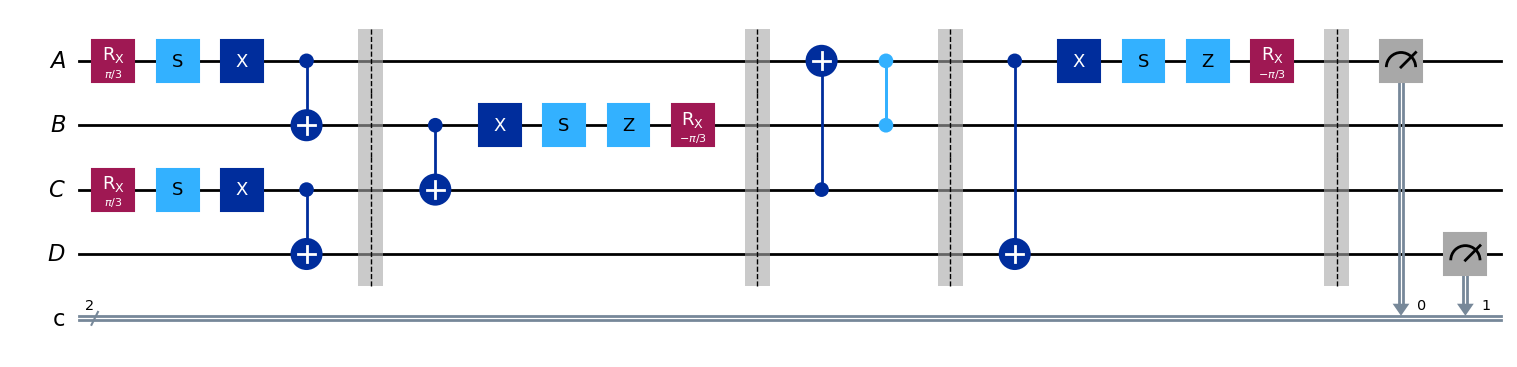

In [28]:
bell = QuantumCircuit(QuantumRegister(1, 'A'), QuantumRegister(1, 'B'), QuantumRegister(1, 'C'), QuantumRegister(1, 'D'), cr)
bell.rx(pi/3,0)
bell.s(0)
bell.x(0)
bell.cx(0, 1)

bell.rx(pi/3,2)
bell.s(2)
bell.x(2)
bell.cx(2, 3)
# bell.x(2)
bell.barrier()

# Bell measurement of 1 and 2
bell.cx(1, 2)
bell.x(1)
bell.z(1)
bell.s(1)
bell.rx(-pi/3,1)
bell.barrier()
# bell.measure([1,2],[0,1])

# recover original bell state
bell.cx(2, 0)
bell.cz(1, 0)
bell.barrier()

# reverce 1,2 to computational basis
# bell.rx(pi/3,1)
# bell.s(1)
# bell.x(1)
# bell.cx(1, 2)
# bell.barrier()

# reverce 0,3 to computational basis
bell.cx(0, 3)
bell.x(0)
bell.z(0)
bell.s(0)
bell.rx(-pi/3,0)
bell.barrier()

bell.measure([0, 3],[0, 1])

print("Original Circuit:")
print(bell)
bell.draw("mpl")

#### Verify results

Measuremet result: {0: np.float64(0.8876953125), 1: np.float64(0.1123046875)}


/var/folders/0t/km7c8b2x75j9d7rvg3qmbbw40000gn/T/ipykernel_45586/245224311.py:2: DeprecationWarning: The class ``qiskit.primitives.sampler.Sampler`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseSamplerV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `Sampler` class is `StatevectorSampler`.
  sampler = Sampler()


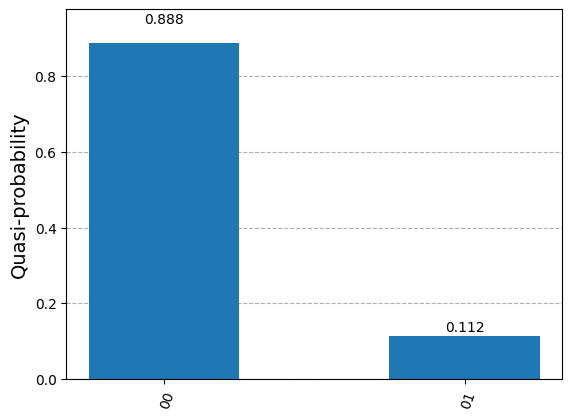

In [29]:
# Use the Sampler to simulate the circuit
sampler = Sampler()
job = sampler.run(circuits=bell, shots=1024)
result = job.result()

# Get the result counts and convert quasi-probabilities to probabilities
counts = result.quasi_dists[0].binary_probabilities()

# print result
print("Measuremet result:", result.quasi_dists[0])

# Plot the result as a histogram
plot_histogram(counts)